In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from netCDF4 import Dataset

import numpy as np
import Nio,Ngl
import os,sys
import datetime


(211, 185)


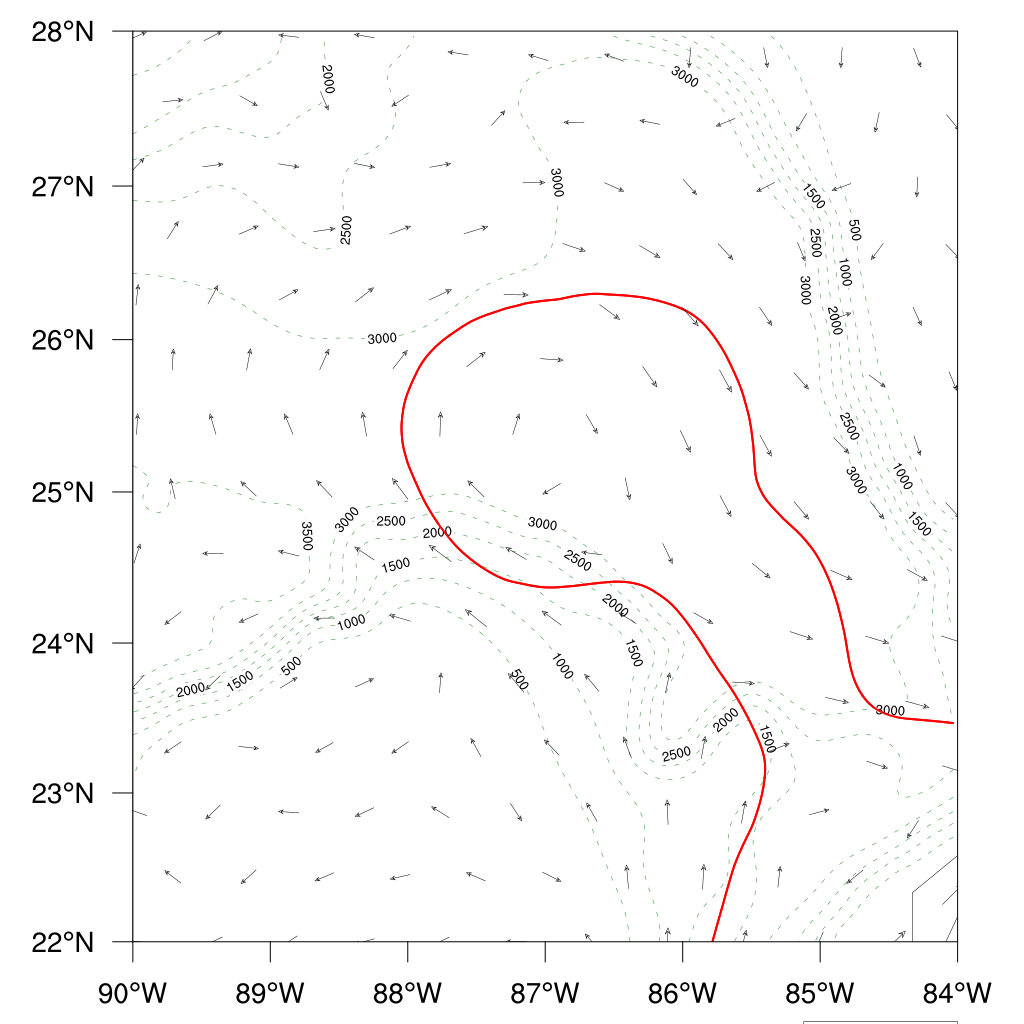

In [3]:
  latbound_s  = 22 #21
  latbound_n  = 28 #29
  lonbound_w  = -90 #-91
  lonbound_e  = -84 #-82
  path_to_output = "/scratch/rhe/GoM/Data-Assimilation/jan2009b/"

  #-- open file
  f = Nio.open_file(path_to_output+"instance_0001/roms_posterior_0001_54939.nc","r")
  gridf = Nio.open_file(path_to_output+"instance_0001/useast_ini_0001.nc","r")
  lats=gridf.variables['lat_rho'][:,0]
  lons=gridf.variables['lon_rho'][0,:]
  # latitude lower and upper index
  lati_s = (np.abs(lats - latbound_s)).argmin()
  lati_n = (np.abs(lats - latbound_n)).argmin()
  loni_w = (np.abs(lons - lonbound_w)).argmin()
  loni_e = (np.abs(lons - lonbound_e)).argmin()
  lats_sub = lats[lati_s:lati_n]
  lons_sub = lons[loni_w:loni_e]
  inf = Nio.open_file("../ncs/mean_zeta_u_v_full.nc","r")
  zmean = inf.variables['zeta'][lati_s:lati_n,loni_w:loni_e]
  umean = inf.variables['u'][lati_s:lati_n,loni_w:loni_e]
  vmean = inf.variables['v'][lati_s:lati_n,loni_w:loni_e]
  umean[umean>100] = 0
  vmean[vmean>100] = 0

  print(zmean.shape)
  h=gridf.variables['h'][lati_s:lati_n,loni_w:loni_e]

  wks_type = "png"
  wks = Ngl.open_wks(wks_type,"mean_17cm")
  Ngl.define_colormap(wks,"default")         # Change color map.
    
  mres                     = Ngl.Resources()
  mres.mpLimitMode           = "LatLon"   # Specify area of map
  mres.mpMaxLatF             = latbound_n       # to zoom in on.
  mres.mpMinLatF             = latbound_s
  mres.mpMaxLonF             = lonbound_e        # to zoom in on.
  mres.mpMinLonF             = lonbound_w
  mres.sfXArray             = lons_sub         # Area of map to overlay 
  mres.sfYArray             = lats_sub        # contours on.
  mres.mpProjection        = "Mercator"    # choose projection
  mres.tfDoNDCOverlay      = True                  # native grid, no transform
  mres.nglDraw             = False                 # don't draw yet
  mres.nglFrame            = False                 # don't advance frame yet
  mres.pmTickMarkDisplayMode = "Always"            # turn on tickmarks    



  res = Ngl.Resources()
  for t in dir(mres):
   if (t[0:2] == 'cn' or t[0:2] == 'sf' or t[0:3] == 'ngl'):
    setattr(res,t,getattr(mres,t))

  res.mpLimitMode           = "LatLon"   # Specify area of map

  res.sfXArray             = lons_sub         # Area of map to overlay 
  res.sfYArray             = lats_sub         # contours on.
  plot_base = Ngl.map(wks,mres)

    
  res.cnLevelSelectionMode = "ExplicitLevels" # explicit contour levels
  res.cnLevels             = 0.17             # which level(s) to plot
  res.cnInfoLabelOn        = False            # no info label
  res.cnLineLabelsOn       = False            # no line labels
  res.cnLineThicknessF     = 4                # thickness of contour lines
  res.cnLineColor = 'red'  
  plot = Ngl.contour(wks,zmean,res)           # Generate contours.
  Ngl.overlay(plot_base,plot)                  # Overlay this contour on map.      
    
  res.cnLineColor = 'forestgreen'    
  res.cnLevelSelectionMode             = "ManualLevels"         
  res.cnMinLevelValF       = 0          # contour levels.
  res.cnMaxLevelValF       = 5000.
  res.cnLevelSpacingF      = 500.
  res.cnLineThicknessF     = 1                # thickness of contour lines
  res.cnLineDashPattern    = 2
  res.cnLineLabelsOn       = True            # no line labels
  res.cnLineLabelFontHeightF = 0.007
  res.cnLineLabelInterval = 1
  plotb = Ngl.contour(wks,h,res)  
  Ngl.overlay(plot_base,plotb)                  # Overlay this contour on map.

  res.cnLevelSelectionMode = "ExplicitLevels" # explicit contour levels
  res.cnLevels             = 0.17             # which level(s) to plot
  res.cnInfoLabelOn        = False            # no info label
  res.cnLineLabelsOn       = False            # no line labels
  res.cnLineThicknessF     = 4                # thickness of contour lines
  res.cnLineColor = 'red'  
  res.cnLineDashPattern    = 0
  plot = Ngl.contour(wks,zmean,res)           # Generate contours.
  Ngl.overlay(plot_base,plot)                  # Overlay this contour on map.    




  vres = Ngl.Resources()
  vres.vfXArray = lons_sub
  vres.vfYArray = lats_sub
  vres.vcMinFracLengthF = 0.23
  vres.vcRefMagnitudeF  = 5.0
  vres.vcRefLengthF     = 0.06
  vres.nglDraw             = False                 # don't draw yet
  vres.nglFrame            = False                 # don't advance frame yet
  vres.vcMinDistanceF = 0.05
  vplot = Ngl.vector(wks, umean, vmean, vres)
  
  Ngl.overlay(plot_base,vplot)                  # Overlay this contour on map.    

  Ngl.draw(plot_base)
  Ngl.frame(wks)
  #Ngl.draw(vplot)                  # Overlay this contour on map.
  #Ngl.frame(wks)
  from IPython.display import Image
  Image("mean_17cm.png")